Se ha utilizado un cuadernillo para google colab, el cual utiliza lenguaje phyton y recursos computacionales en la nube. por las demandas del proyecto se contrato un servisio de paga que amplia las capacidades de procesamiento.

se instala el framework ultralytics para disponer y acceder a la funcionalidad del modelo preentrenado yolo8, en sus capacidades de segmentacion semantica

In [1]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


Se va ha descargar el modelo preentrenado yolov8m-seg.pt

In [ ]:
# !yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/bus.jpg'

integramos nuestro google drive a este computador para acceder a informacion almacenada en el mismo

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


instalamos librerias roboflow, que nos permitiran acceder a nuestro dataset (imagenes,marcaciones en formato yolo8)

In [4]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="528wrp2Ozz8HJ5FwcbPx")
# project = rf.workspace("san-francisco-xavier-university").project("2doparcial")
# dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="528wrp2Ozz8HJ5FwcbPx")
project = rf.workspace("san-francisco-xavier-university").project("second_exam-maybe2")
dataset = project.version(1).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existi

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.208, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to second_exam-maybe2-1 in yolov8:: 100%|██████████| 1768/1768 [00:00<00:00, 9449.45it/s]


Importamos el objeto yolo dr la libreria ultralytics para utilizar el modelo para el entrenamiento con datos especificos (residuos solidos en las orillas del rio), porque el modelo no reconoce este tipo de objetos en estas circunstancias.
importamos las clase display e Image de la libreria de IPhyton.display para visualizar las fotografias cuando asi se requieran

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

creamos object model de la clase YOLO que utiliza un modelo preentrenado yolov8m-seg.pt

In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/second_exam-maybe2-1/data.yaml epochs=30 imgsz=416 plots=True
# !yolo task=detect mode=train model=yolov8n-seg.pt data= /content/dataset-29/data.yaml epochs=2 imgsz=640 plots=True save_period=1


Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/second_exam-maybe2-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!yolo task=segment mode=train resume model=/content/runs/segment/train23/weights/best.pt data= /content/second_exam-maybe2-1/data.yaml epochs=30 imgsz=416 plots=True save_period=1

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/runs/segment/train23/weights/best.pt, data=/content/second_exam-maybe2-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train232, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [ ]:
!yolo task=segment mode=train resume model=/content/runs/segment/train2/weights/best.pt data= /content/second_exam-maybe2-1/data.yaml epochs=30 imgsz=416 plots=True save_period=1

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/runs/segment/train2/weights/best.pt, data=/content/second_exam-maybe2-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

In [7]:
!yolo task=segment mode=train resume model=/content/drive/MyDrive/SIS421/pesps/best.pt data= /content/second_exam-maybe2-1/data.yaml epochs=10 imgsz=416 plots=True save_period=1 lr0=0.0005

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/SIS421/pesps/best.pt, data=/content/second_exam-maybe2-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2323, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

In [ ]:
!ls /content/runs/segment/train232/

args.yaml					     labels.jpg		  train_batch1021.jpg
BoxF1_curve.png					     MaskF1_curve.png	  train_batch1022.jpg
BoxP_curve.png					     MaskP_curve.png	  train_batch1.jpg
BoxPR_curve.png					     MaskPR_curve.png	  train_batch2.jpg
BoxR_curve.png					     MaskR_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1699579759.0077b86858fb.12924.0  train_batch0.jpg	  val_batch1_pred.jpg
labels_correlogram.jpg				     train_batch1020.jpg  weights


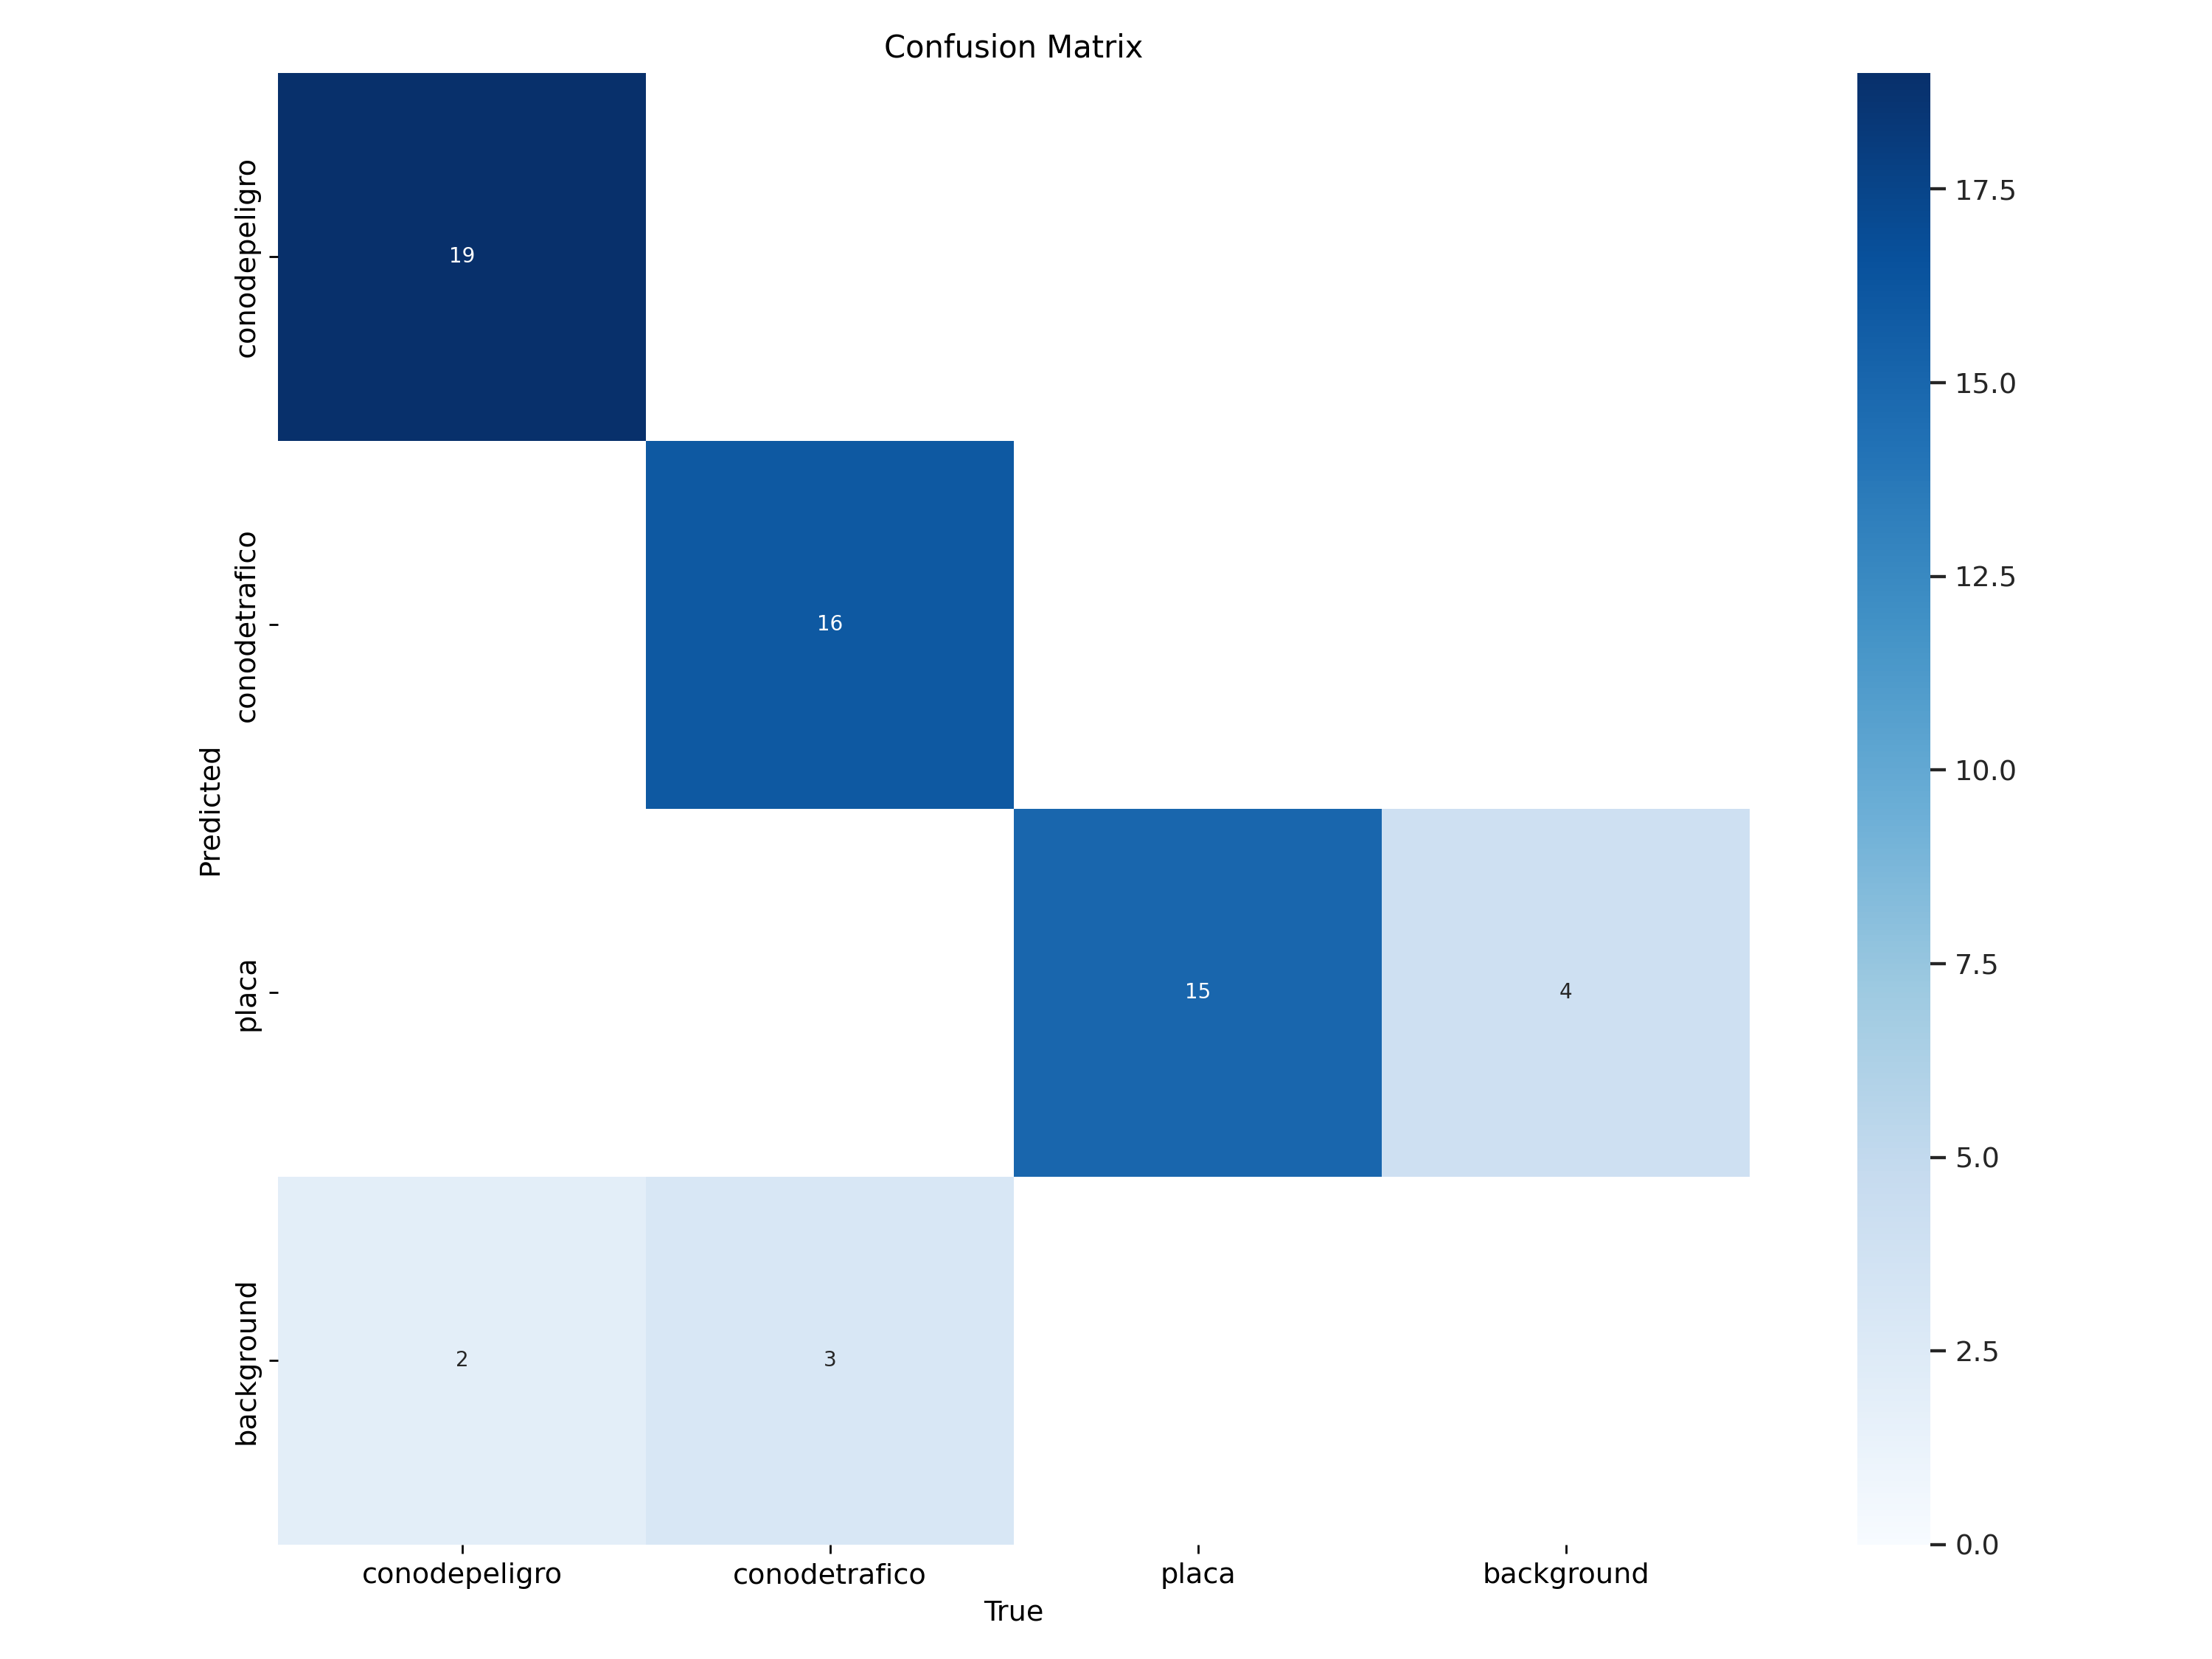

In [ ]:
Image(filename='/content/runs/segment/train232/confusion_matrix.png', width=900)

In [ ]:
!ls /content/runs/detect/train2/

args.yaml					    P_curve.png       train_batch230.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch231.jpg
confusion_matrix.png				    R_curve.png       train_batch232.jpg
events.out.tfevents.1699484654.61432ac7fb24.1764.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


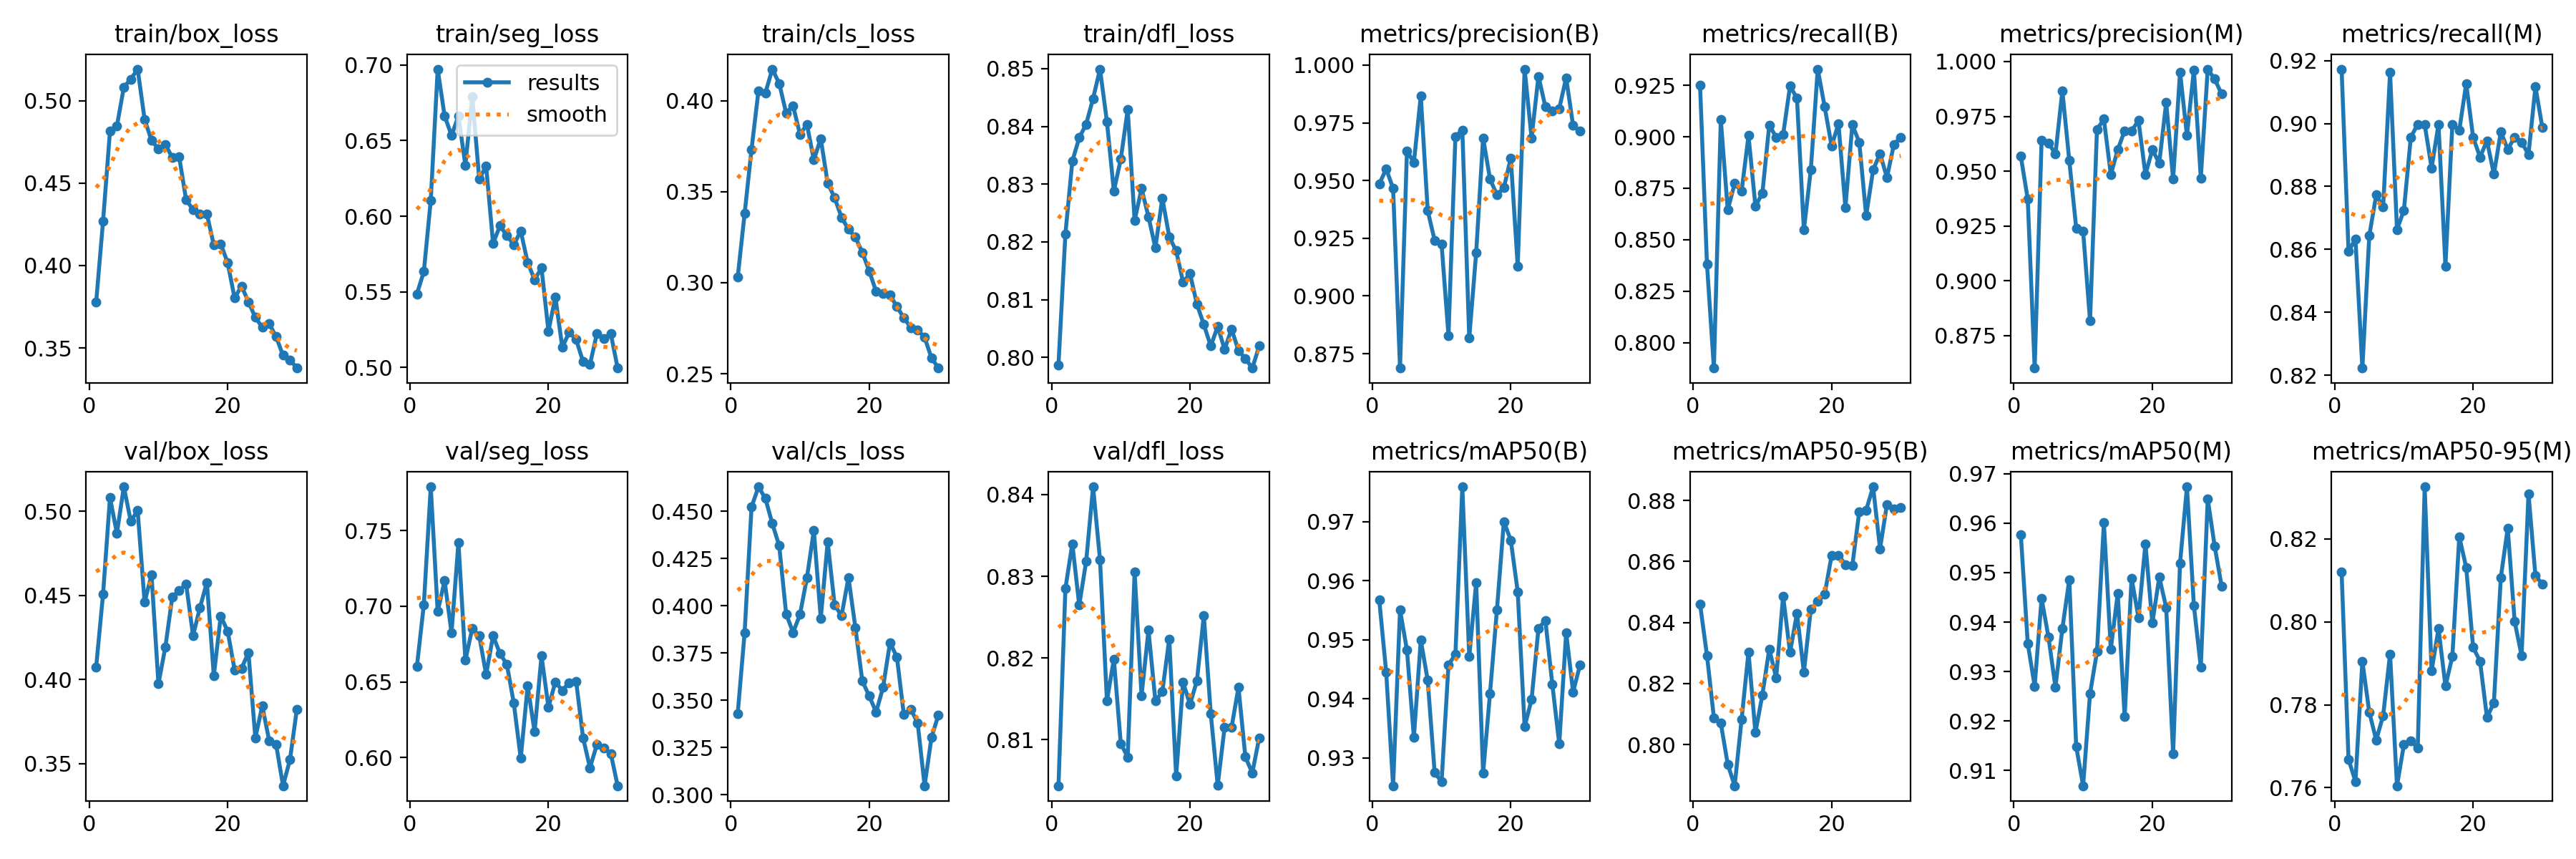

In [ ]:
Image(filename='/content/runs/segment/train232/results.png', width=1200)

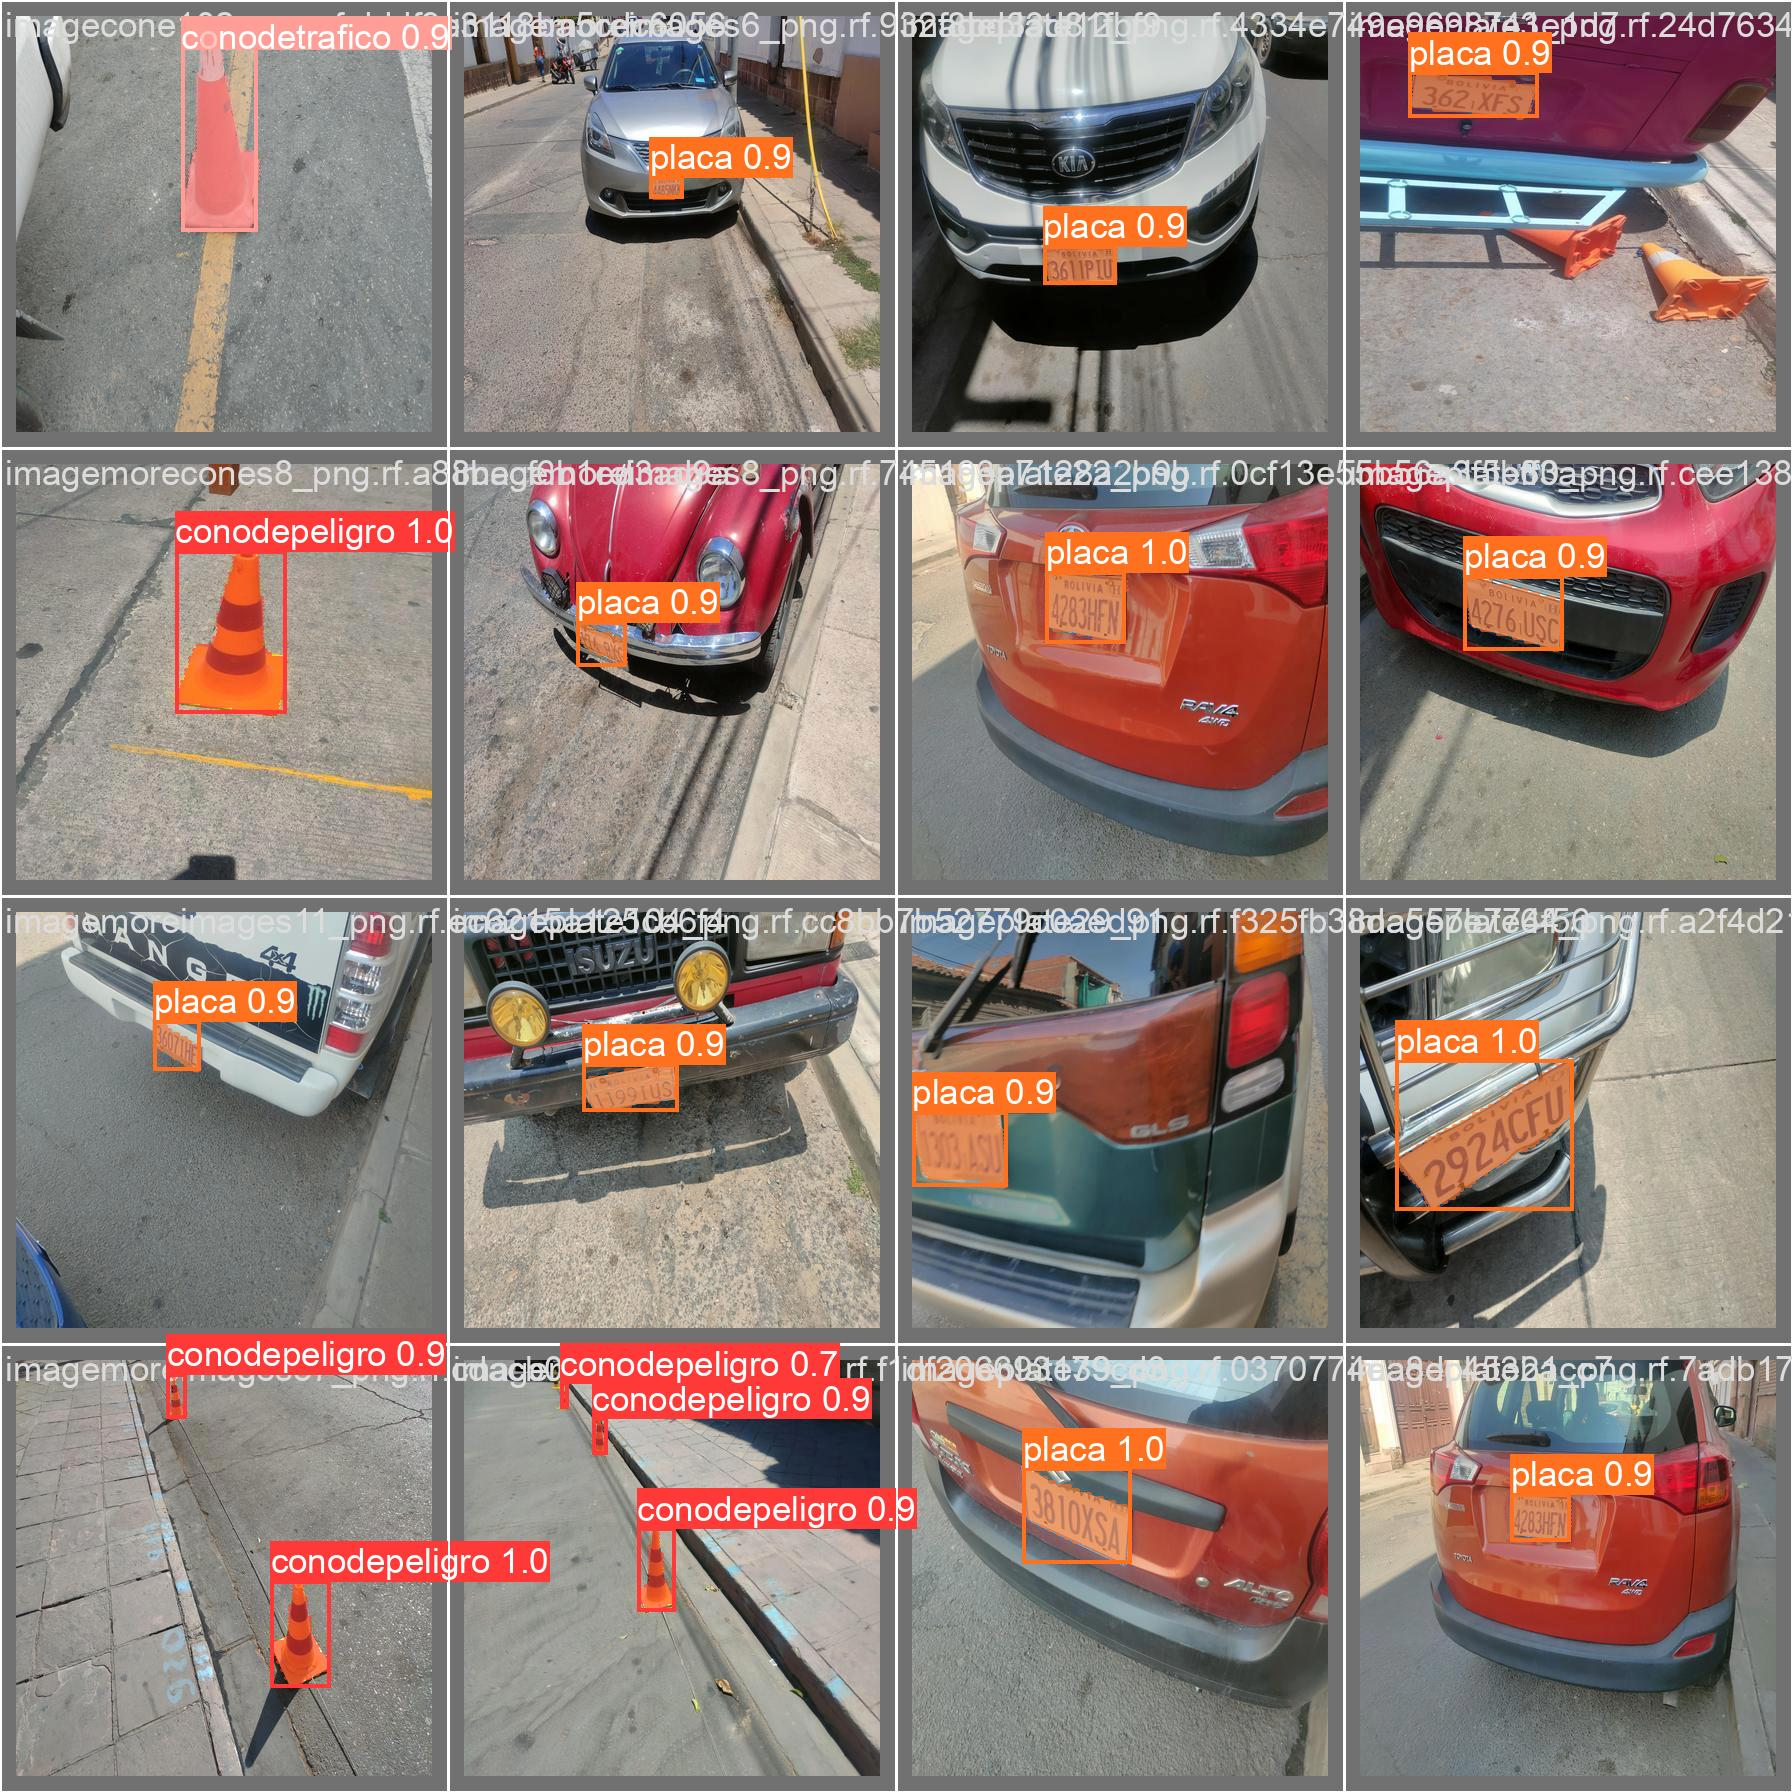

In [ ]:
Image(filename='/content/runs/segment/train232/val_batch0_pred.jpg', width=900)

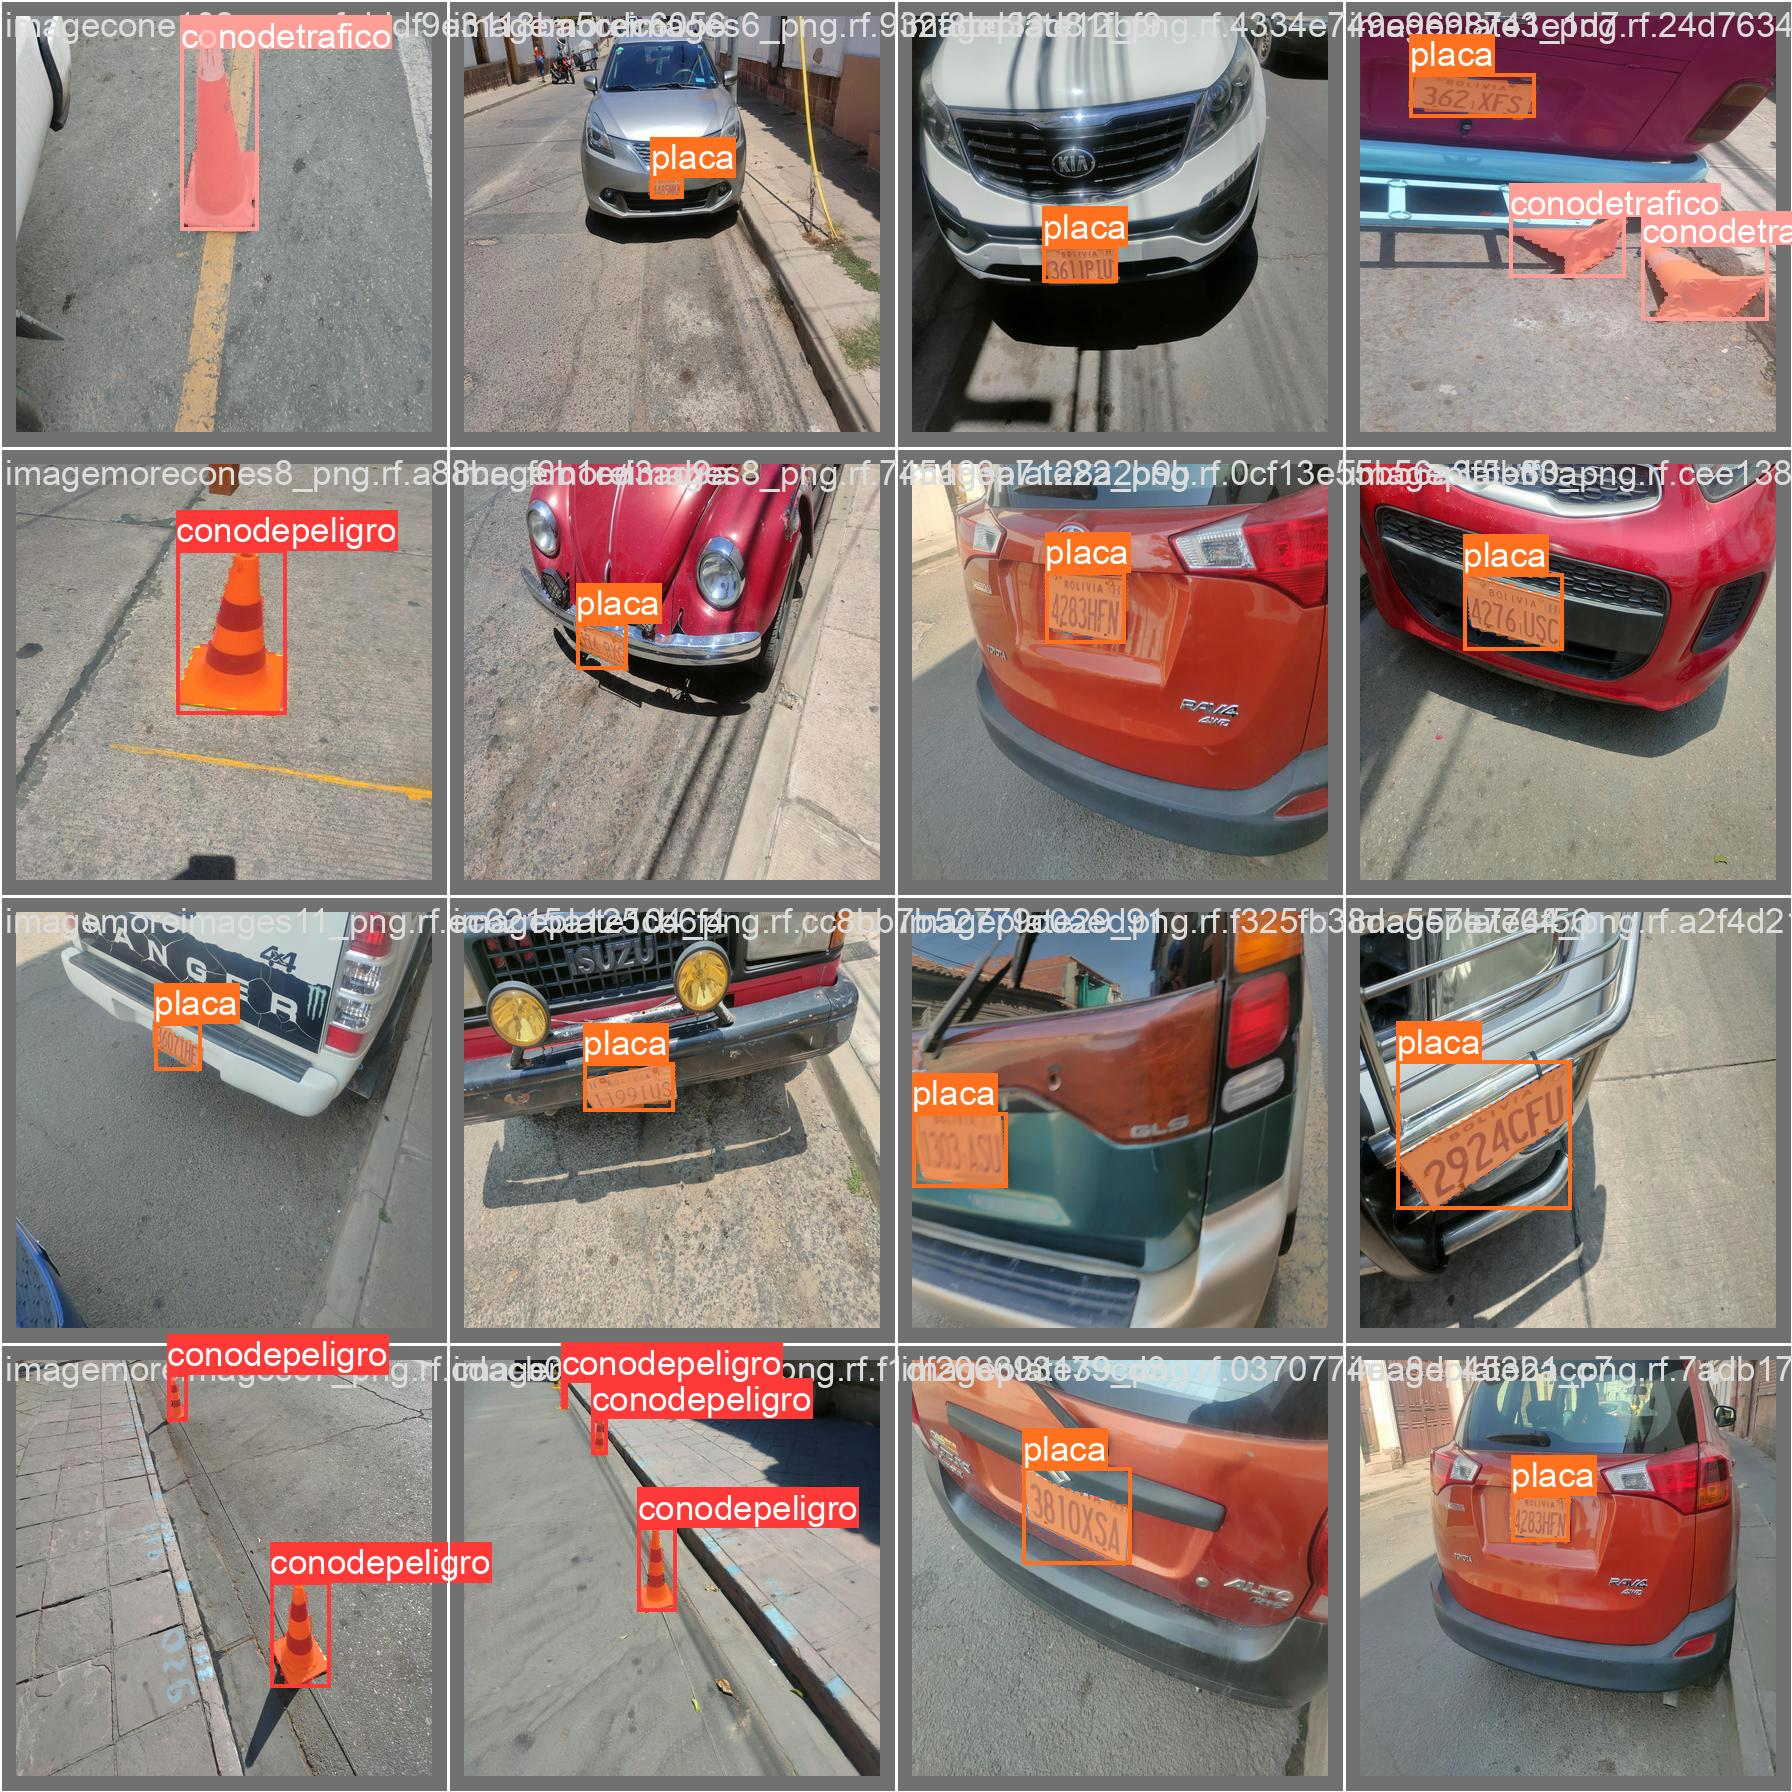

In [ ]:
Image(filename='/content/runs/segment/train232/val_batch0_labels.jpg', width=900)

In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train232/weights/best.pt data=/content/second_exam-maybe2-1/data.yaml

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/second_exam-maybe2-1/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.66it/s]
                   all         35         55      0.994       0.88      0.951       0.88      0.977      0.874      0.957      0.823
         conodepeligro         35         21      0.988       0.81      0.924      0.857      0.942      0.781      0.941      0.776
         conodetrafico         35         19      0.995      0.842      0.935      0.847       0.99      0.842      0.935      0.798
                 placa         35         15          1      0.989      0.995      0.936      0.999          1      0.995      0

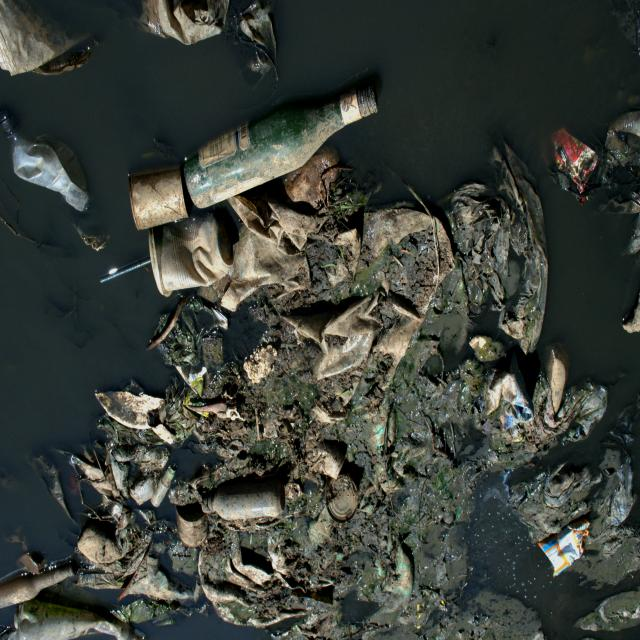

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='DSC_3594_jpg.rf.47185313a4ad997a1648d7227e779e87'
img =cv2.imread(f"/content/drive/MyDrive/JMB/dataset/train/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/JMB/dataset/train/images/{img_name}.jpg", width=600)

In [ ]:
model= YOLO("/content/drive/MyDrive/JMB/dataset/runs/segment/train/segment/train/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 640x640 (no detections), 69.6ms
Speed: 2.6ms preprocess, 69.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


True

In [ ]:
%cd /content/drive/MyDrive/JMB/dataset
!ls

/content/drive/MyDrive/JMB/dataset
data.yaml					      test   yolov8l-seg.pt
DSC_3594_jpg.rf.47185313a4ad997a1648d7227e779e87.jpg  train  yolov8n.pt
README.roboflow.txt				      val
runs						      valid


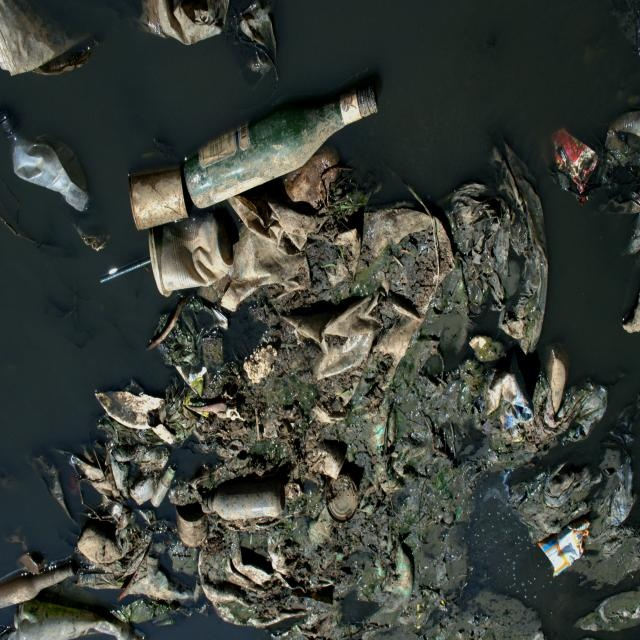

In [ ]:
Image(filename=f"/content/drive/MyDrive/JMB/dataset/{img_name}.jpg", width=640)